In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:,.2f}".format)


In [18]:
df_custos = pd.read_csv("/home/rodrigo/controladoria-industrial/data/raw/custos_lancamentos_raw.csv")
df_producao = pd.read_csv("/home/rodrigo/controladoria-industrial/data/raw/producao_raw.csv")
df_centros = pd.read_csv("/home/rodrigo/controladoria-industrial/data/raw/centros_custo_raw.csv")
df_produtos = pd.read_csv("/home/rodrigo/controladoria-industrial/data/raw/produtos_raw.csv")

In [19]:
df_custos.head()


,id_lancamento,data,centro_custo,tipo_custo,categoria,valor,fornecedor,ordem_producao
0,1,2024-02-01,CC500,Direto,materia prima,"14,739.93",Fornecedor A,OP5288
1,2,2024-05-17,CC200,Indireto,energia,"19,927.67",Fornecedor A,NaN
2,3,2023-03-31,CC300,Indireto,energia,"17,983.71",Energia SA,NaN
3,4,2024-12-18,CC200,Indireto,mao de obra,"17,042.10",Fornecedor C,NaN
4,5,2024-05-20,CC100,Direto,energia,"15,862.11",Fornecedor C,OP7044


In [20]:
df_custos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_lancamento   800 non-null    int64  
 1   data            800 non-null    object 
 2   centro_custo    760 non-null    object 
 3   tipo_custo      800 non-null    object 
 4   categoria       800 non-null    object 
 5   valor           800 non-null    float64
 6   fornecedor      800 non-null    object 
 7   ordem_producao  412 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 50.1+ KB


In [21]:
df_custos.describe()


,id_lancamento,valor
count,800.00,800.00
mean,400.50,"9,772.54"
std,231.08,"6,572.31"
min,1.00,"-19,444.43"
25%,200.75,"4,874.39"
50%,400.50,"10,307.52"
75%,600.25,"14,909.30"
max,800.00,"19,996.44"


In [22]:
df_custos[df_custos["valor"] < 0].shape

(21, 8)

In [23]:
df_custos[df_custos["valor"] < 0].head()


,id_lancamento,data,centro_custo,tipo_custo,categoria,valor,fornecedor,ordem_producao
52,53,2023-08-12,CC500,Direto,manutencao,"-5,163.70",Fornecedor A,OP1742
95,96,2024-02-10,CC300,Indireto,materia prima,"-2,796.24",Serviços LTDA,OP7224
111,112,2023-08-08,CC200,Indireto,frete,"-8,648.10",Fornecedor C,NaN
128,129,2023-04-06,CC400,Indireto,manutencao,"-6,613.06",Energia SA,NaN
144,145,2023-08-09,CC100,Direto,materia prima,"-11,788.53",Fornecedor A,OP7520


In [24]:
df_custos["centro_custo"].isna().sum()


np.int64(40)

In [25]:
df_custos[df_custos["centro_custo"].isna()].head()


,id_lancamento,data,centro_custo,tipo_custo,categoria,valor,fornecedor,ordem_producao
23,24,2024-06-11,NaN,Indireto,frete,"9,194.07",Fornecedor C,NaN
30,31,2024-06-29,NaN,Indireto,mao de obra,"19,138.04",Serviços LTDA,OP6804
39,40,2023-10-24,NaN,Indireto,manutencao,"3,807.60",Fornecedor A,NaN
63,64,2024-06-21,NaN,Direto,mao de obra,"18,837.57",Energia SA,OP7821
65,66,2024-07-24,NaN,Indireto,materia prima,"11,291.48",Fornecedor B,NaN


In [26]:
df_custos["categoria"].value_counts()

categoria
manutencao            165
servicos terceiros    137
energia               134
materia prima         127
mao de obra           122
frete                 115
Name: count, dtype: int64

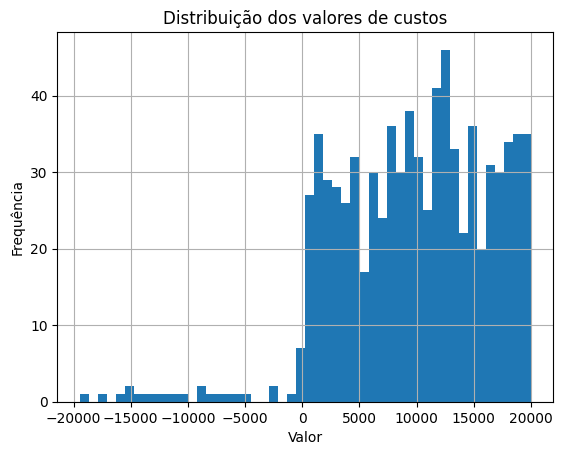

In [27]:
plt.figure()
df_custos["valor"].hist(bins=50)
plt.title("Distribuição dos valores de custos")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()


In [28]:
df_custos.groupby("tipo_custo")["valor"].sum()


tipo_custo
Direto     3,638,762.09
Indireto   4,179,271.09
Name: valor, dtype: float64

In [29]:
df_producao.head()


,data,produto,linha_producao,quantidade_produzida,horas_maquina,centro_custo
0,2023-10-09,PROD_A,Linha 1,164,9.88,CC100
1,2024-08-27,PROD_A,Linha 2,66,6.04,CC100
2,2024-06-01,PROD_B,Linha 1,337,11.96,CC100
3,2023-08-14,PROD_E,Linha 2,351,14.74,CC200
4,2024-12-15,PROD_A,Linha 2,224,14.73,CC100


In [30]:
df_producao.describe()


,quantidade_produzida,horas_maquina
count,300.00,300.00
mean,269.59,21.71
std,133.73,9.98
min,50.00,5.09
25%,158.50,12.74
50%,268.00,20.55
75%,388.00,30.39
max,499.00,39.95


In [31]:
df_producao.groupby("produto")["quantidade_produzida"].sum()


produto
PROD_A    16090
PROD_B    13030
PROD_C    14801
PROD_D    16946
PROD_E    20010
Name: quantidade_produzida, dtype: int64